In [1]:
import vrpSolver

import random
import shapely
from shapely.geometry import mapping

In [2]:
N = 50

In [3]:
nodes = vrpSolver.rndPlainNodes(
    N = N)
# nodes = vrpSolver.loadDictionary('test')

In [4]:
# vrpSolver.saveDictionary(nodes, 'test')

In [5]:
fig, ax = vrpSolver.plotNodes(
    nodes = nodes,
    figSize = (10, 10),
    boundingBox = (-20, 120, -20, 120))

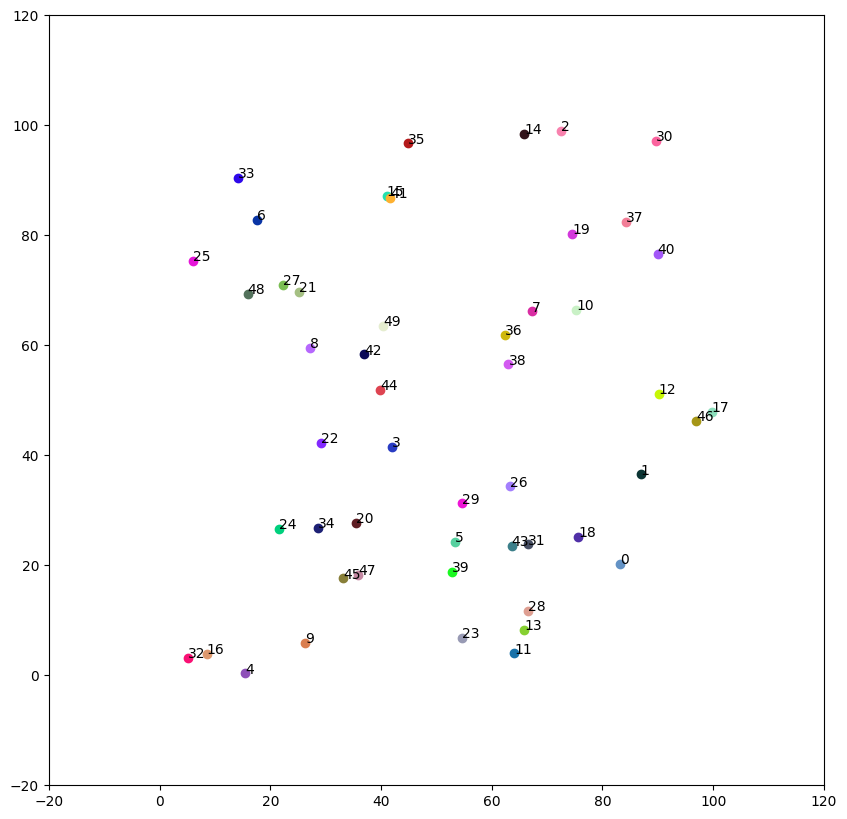

In [6]:
fig

In [7]:
k = [i for i in range(1, N)]
for i in range(int(N/5)):
    k.remove(k[random.randint(0, len(k) - 1)])

for i in k:
    nodes = vrpSolver.createNeighbor(
        nodes = nodes,
        nodeIDs = [i],
        neighbor = {'shape': 'circle', 'radius': random.randint(3, 8), 'lod': 30})

In [8]:
fig, ax = vrpSolver.plotNodes(
    nodes = nodes,
    figSize = (10, 10),
    boundingBox = (-20, 120, -20, 120))

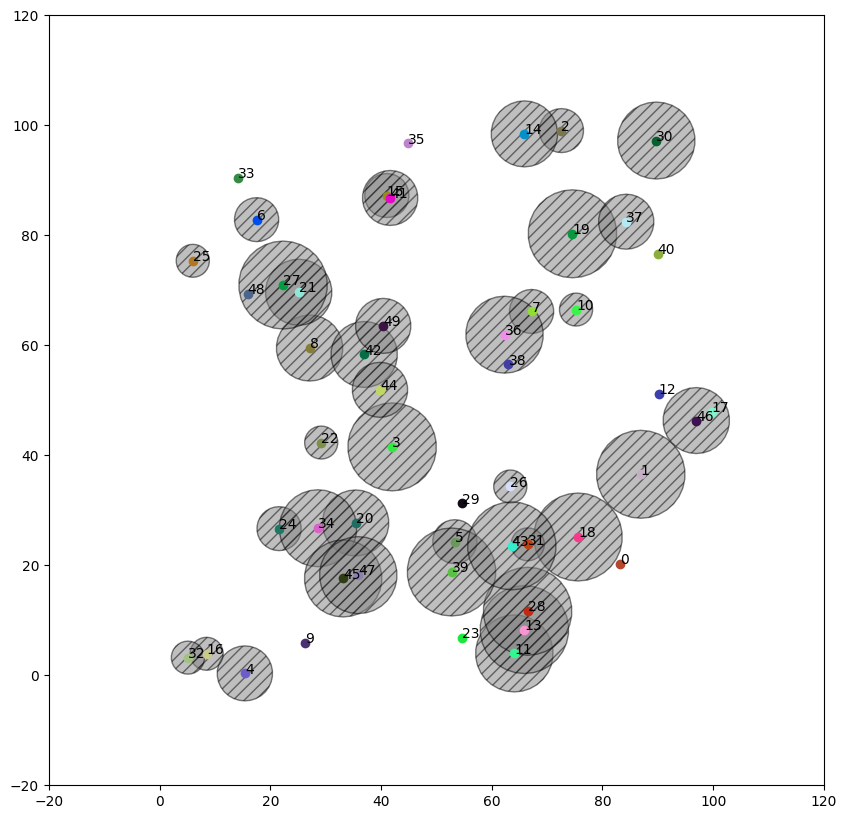

In [9]:
fig

In [10]:
tsp = vrpSolver.ipTSP(
    nodes = nodes,
    edges = {'method': 'Euclidean'},
    fml = 'DFJ_Lazy',
    solver = {'solver': 'COPT', 'timeLimit': 10, 'outputFlag': False})

Cardinal Optimizer v6.5.3. Build date Apr 28 2023
Copyright Cardinal Operations 2023. All Rights Reserved



In [11]:
fig, ax = vrpSolver.plotRoute(
    fig = fig,
    ax = ax,
    nodes = nodes,
    figSize = (10, 10),
    route = tsp['seq'])

In [12]:
tsp['ofv']

539.1621479367826

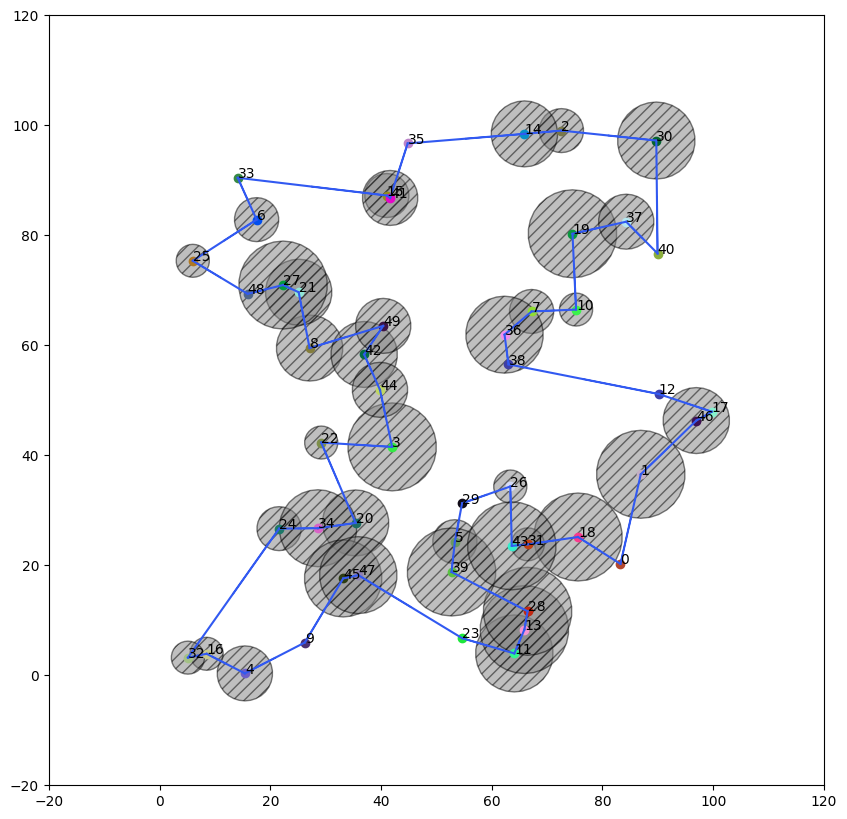

In [13]:
fig

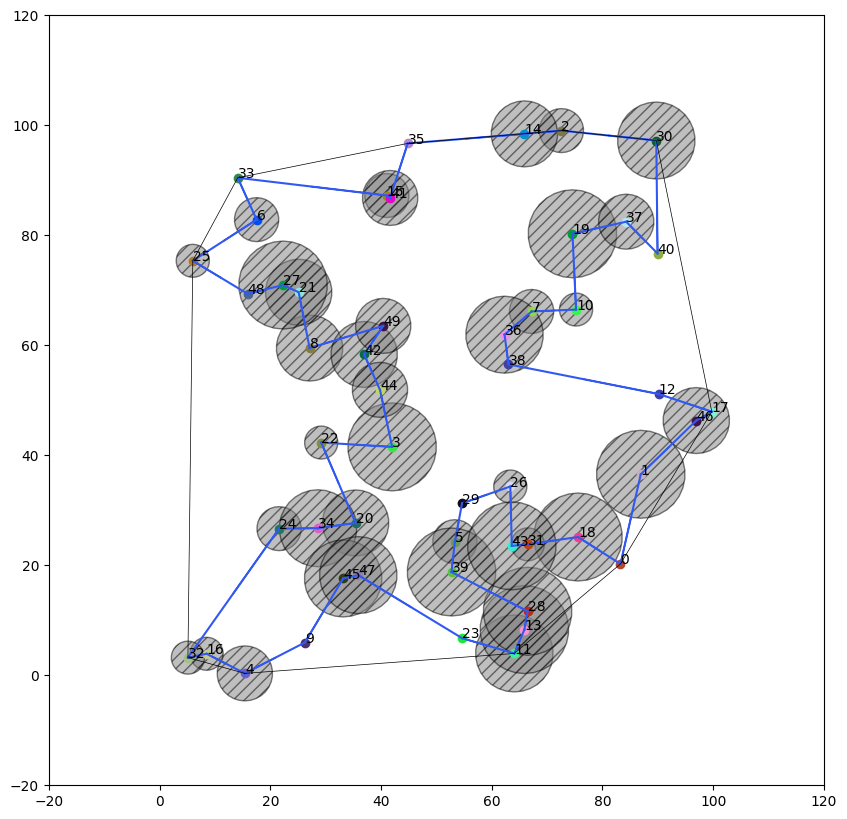

In [14]:
lstNodeLoc = []
for n in nodes:
    lstNodeLoc.append(shapely.Point(nodes[n]['loc']))
ch = shapely.convex_hull(shapely.MultiPoint(points = lstNodeLoc))
convexHull = [i for i in mapping(ch)['coordinates'][0]]
fig, ax = vrpSolver.plotPolygon(
    fig = fig,
    ax = ax,
    figSize = (10, 10),
    poly = convexHull,
    edgeColor = 'black')
fig

In [15]:
ch = vrpSolver.cutNodesNeighbor(nodes)

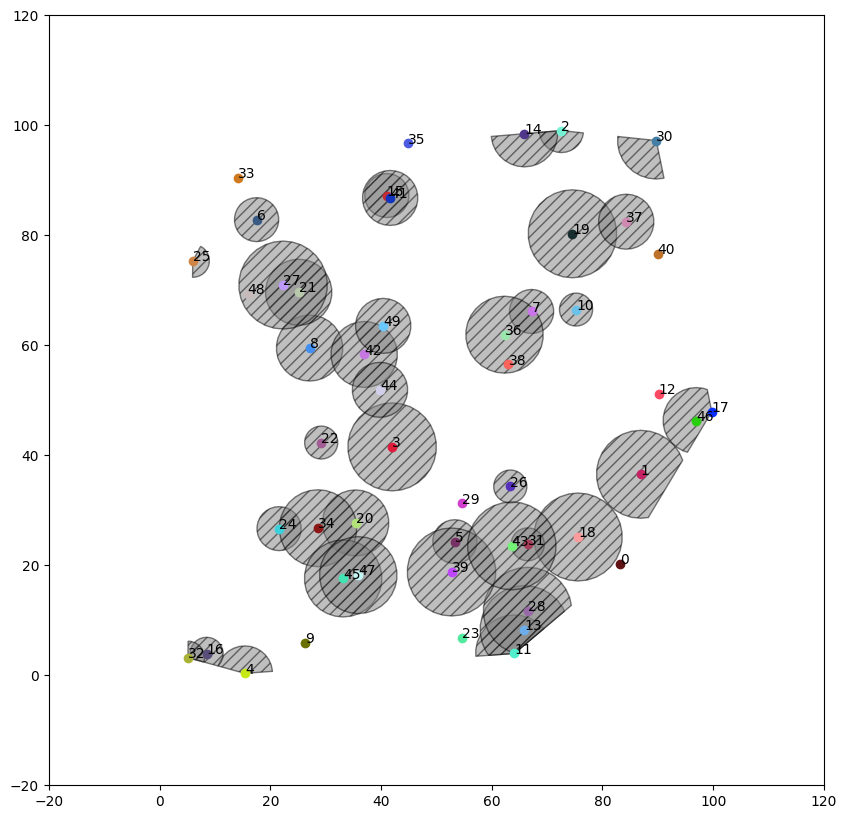

In [16]:
fig, ax = vrpSolver.plotNodes(
    nodes = ch,
    figSize = (10, 10),
    neighborColor = 'gray',
    boundingBox = (-20, 120, -20, 120))
fig

In [17]:
sz = vrpSolver.createSteinerZone(nodes)

C:\Users\isaac\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [18]:
sz

[{'poly': [(83.26360218713822, 20.24773397389984)],
  'repPt': (83.26360218713822, 20.24773397389984),
  'nodeIDs': [0]},
 {'poly': [(88.29218948471826, 28.6873264222094),
   (86.92750420559211, 28.54389221956852),
   (85.26421067905004, 28.718711413698074),
   (83.6736110609857, 29.235528558427713),
   (82.22522218725233, 30.07175626456894),
   (80.98234560177296, 31.190847368697654),
   (79.9993009753166, 32.54389221956852),
   (79.31905207523089, 34.07175626456894),
   (78.97132904264593, 35.70766451342728),
   (78.97132904264593, 37.38011992570974),
   (79.31905207523089, 39.0160281745681),
   (79.9993009753166, 40.54389221956852),
   (80.98234560177296, 41.896937070439385),
   (82.22522218725233, 43.0160281745681),
   (83.6736110609857, 43.85225588070933),
   (85.26421067905004, 44.369073025438965),
   (86.92750420559211, 44.54389221956852),
   (88.59079773213419, 44.369073025438965),
   (90.18139735019852, 43.85225588070933),
   (91.6297862239319, 43.0160281745681),
   (92.872662

In [19]:
remain = [i for i in range(N)]
szIDs = []
for i in range(len(sz)):
    szID = len(sz) - i - 1
    
    allInRemain = True
    for j in sz[szID]['nodeIDs']:
        if (j not in remain):
            allInRemain = False
    if (allInRemain):
        szIDs.append(szID)
        for k in sz[szID]['nodeIDs']:
            remain.remove(k)
for szID in szIDs:
    print(sz[szID]['nodeIDs'])

[20, 34, 45, 47]
[28, 39, 43]
[8, 21, 27]
[42, 49]
[36, 38]
[19, 37]
[18, 31]
[17, 46]
[16, 32]
[15, 41]
[11, 13]
[3, 44]
[2, 14]
[48]
[40]
[35]
[33]
[30]
[29]
[26]
[25]
[24]
[23]
[22]
[12]
[10]
[9]
[7]
[6]
[5]
[4]
[1]
[0]


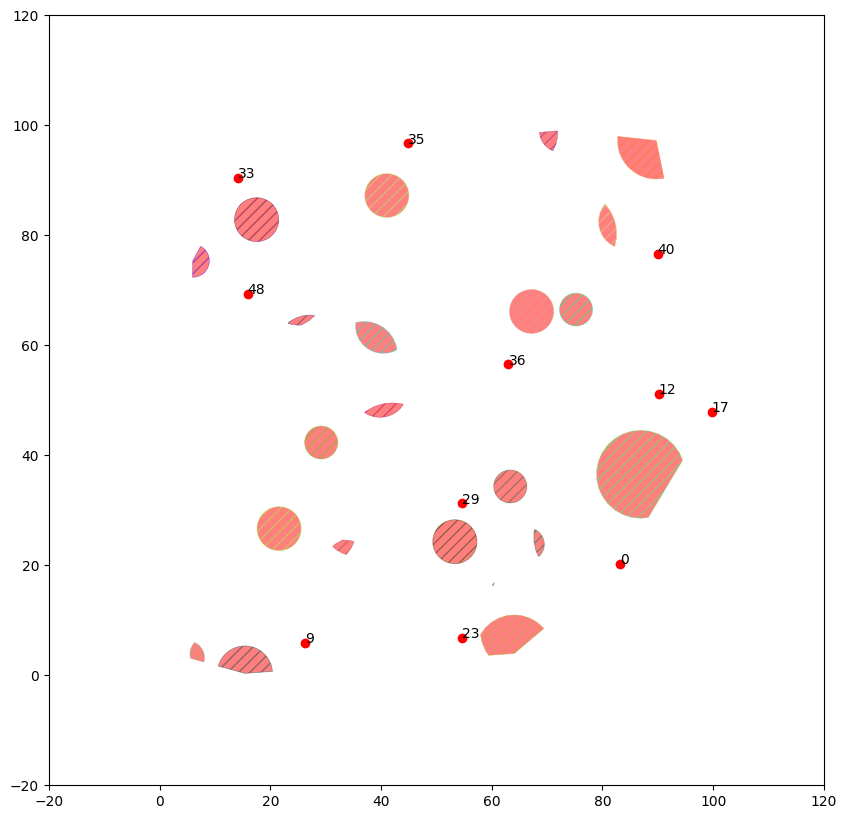

In [20]:
fig = None
ax = None
for szID in szIDs:
    if (len(sz[szID]['poly']) > 1):
        fig, ax = vrpSolver.plotPolygon(
            fig = fig,
            ax = ax,
            poly = sz[szID]['poly'],
            fillColor = 'red',
            figSize = (10, 10),
            boundingBox=(-20, 120, -20, 120))
    else:
        n = {sz[szID]['nodeIDs'][0]: {'loc': sz[szID]['poly'][0]}}
        fig, ax = vrpSolver.plotNodes(
            fig = fig,
            ax = ax,
            nodes = n,
            nodeColor = 'red',
            figSize = (10, 10),
            boundingBox = (-20, 120, -20, 120))
fig

In [21]:
# Get centroids of each selected sz
centerNodes = {}
for szID in szIDs:
    centerNodes[szID] = {
        'loc': sz[szID]['repPt'],
        'neighbor': sz[szID]['poly']
    }
# centerNodes[0]['loc'] = centerNodes[0]['loc'][0]

In [22]:
centerNodes

{96: {'loc': [33.30206601225277, 23.433119574845197],
  'neighbor': [(31.26495977113384, 23.405604347973483),
   (31.78237953670875, 23.871491197496773),
   (33.02177913976197, 24.587058891953063),
   (33.16729753429678, 24.602353491527733),
   (34.622679370021096, 24.449386696664373),
   (35.14538303030297, 24.279549982145756),
   (34.68065982974862, 23.23576458401422),
   (33.82049578159931, 22.051850339502217),
   (33.73171536258434, 21.97191209116668),
   (32.97330406020246, 22.218334861156205),
   (31.88701240490242, 22.845505640762127),
   (31.26495977113384, 23.405604347973483)]},
 94: {'loc': [60.30385458780365, 16.51340855778648],
  'neighbor': [(60.48079297312817, 16.91434918620456),
   (60.35163621551401, 16.306714415490404),
   (60.32538278089435, 16.247748235893347),
   (60.0936738630297, 16.38152544199614),
   (60.48079297312817, 16.91434918620456)]},
 87: {'loc': [25.59250239659804, 64.56324660194275],
  'neighbor': [(25.12819849381737, 63.6485542328347),
   (23.88072834

In [23]:
cetsp = vrpSolver.ipTSP(
    nodes = centerNodes,
    depotID = min(centerNodes),
    edges = {'method': 'Euclidean'},
    fml = 'DFJ_Lazy',
    solver = {'solver': 'COPT', 'outputFlag': False})

Cardinal Optimizer v6.5.3. Build date Apr 28 2023
Copyright Cardinal Operations 2023. All Rights Reserved



In [24]:
cetsp

{'ofv': 473.1922312705715,
 'seq': [0,
  1,
  65,
  12,
  81,
  7,
  10,
  40,
  68,
  30,
  50,
  35,
  63,
  33,
  6,
  25,
  48,
  87,
  84,
  51,
  22,
  96,
  24,
  64,
  4,
  9,
  23,
  59,
  94,
  5,
  29,
  26,
  66,
  0],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 473.1922312705715,
 'upperBound': 473.1922312705715,
 'runtime': 0.2820014953613281,
 'fml': 'DFJ_Lazy',
 'serviceTime': 0}

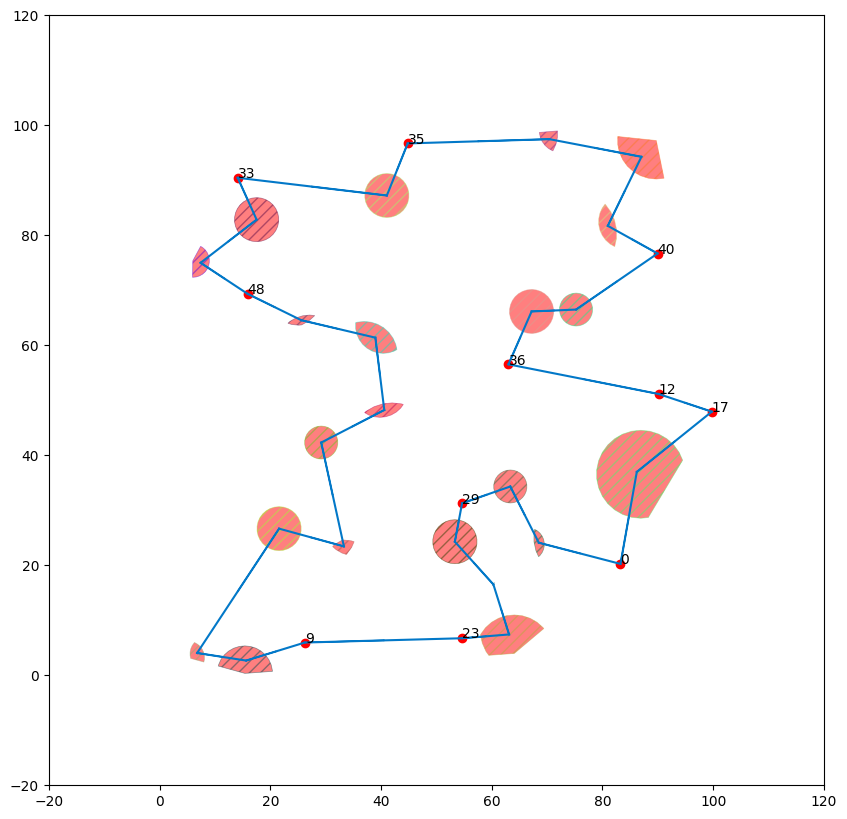

In [25]:
fig, ax = vrpSolver.plotRoute(
    fig = fig,
    ax = ax,
    nodes = centerNodes,
    route = cetsp['seq'])
fig

In [26]:
heuCETSP = vrpSolver.heuCETSP(
    nodes = nodes)

Cardinal Optimizer v6.5.3. Build date Apr 28 2023
Copyright Cardinal Operations 2023. All Rights Reserved



C:\Users\isaac\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: divide by zero encountered in intersection
  return lib.intersection(a, b, **kwargs)


Cardinal Optimizer v6.5.3. Build date Apr 28 2023
Copyright Cardinal Operations 2023. All Rights Reserved

Model fingerprint: 8d4396e9

Using Cardinal Optimizer v6.5.3 on Windows
Hardware has 20 cores and 40 threads. Using instruction set X86_AVX512_E1 (14)
Minimizing an LP problem

The original problem has:
    539 rows, 5512 columns and 21984 non-zero elements
The presolved problem is empty

Postsolving

Method   Iteration           Objective  Primal.NInf   Dual.NInf        Time
Dual             0    4.2265166103e+02            0           0       0.01s

Solving finished
Status: Optimal  Objective: 4.2265166103e+02  Iterations: 0  Time: 0.01s


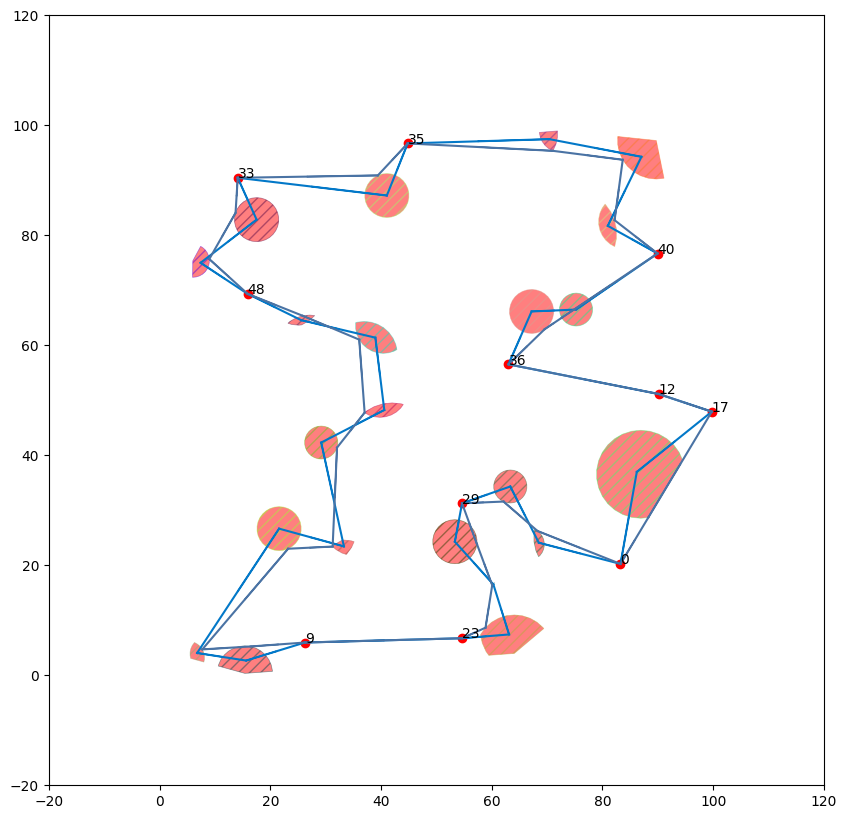

In [27]:
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    seq = heuCETSP['seq'])
fig

In [28]:
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = nodes)

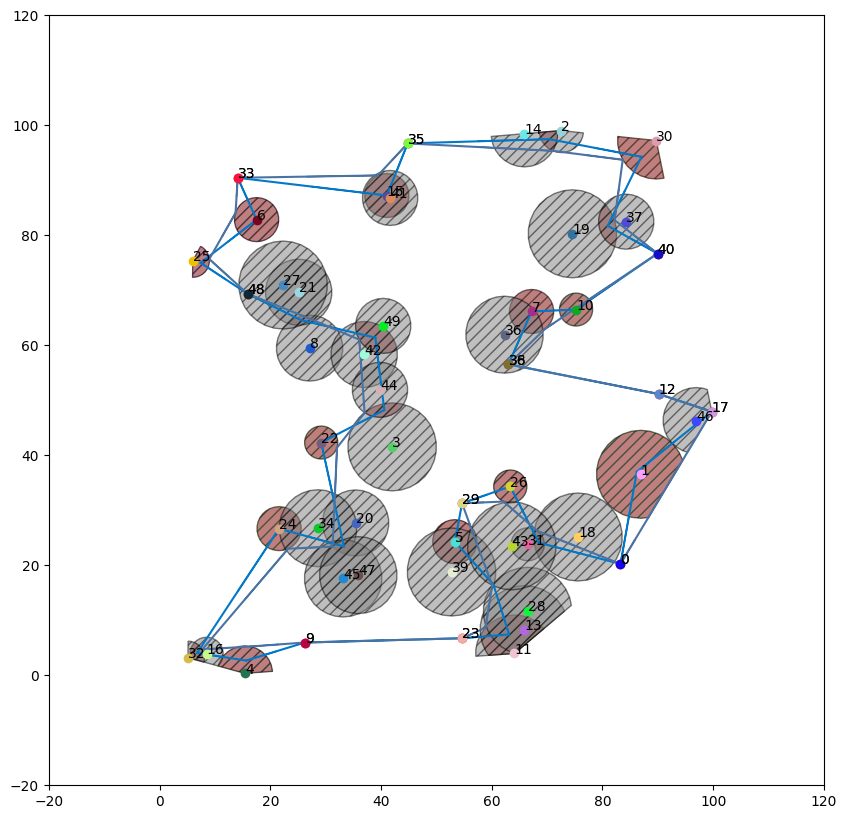

In [29]:
fig

In [30]:
print(tsp['ofv'], cetsp['ofv'], heuCETSP['ofv'])

539.1621479367826 473.1922312705715 422.6516610302995


In [31]:
heuCETSP

{'seq': [(83.26360218713822, 20.24773397389984),
  (88.29218948471826, 28.6873264222094),
  [99.7569701660144, 47.928928632427755],
  (90.17806158043213, 51.13655691124175),
  [63.03040978945015, 56.53467411040219],
  (69.55536791078225, 62.91219848158421),
  (72.63786203812, 64.99344704865402),
  (89.9610510521213, 76.68622474982055),
  (82.19971779352348, 82.74376930126141),
  (83.67066423522729, 93.72705173512493),
  (71.04256888837696, 95.35479794117799),
  (44.82443677109932, 96.70061840569797),
  (39.430126951031625, 90.88330726217738),
  (14.120591613876133, 90.45251305811493),
  (13.725763357445508, 84.08017825495666),
  (8.985563416497447, 75.67157199981011),
  (15.899161266056637, 69.35656210963495),
  (25.8557818874048, 65.36335966934973),
  (36.06881265135775, 61.027957583964366),
  (37.045574223338974, 47.75792319029603),
  (32.054415175108176, 41.38708710124152),
  (31.26495977113384, 23.405604347973483),
  (23.21876844333931, 23.007144968102477),
  (7.720643680261007, 4.